# IS 4487 Lab 4

## Outline

Repeat exercises from Lab 2, but with the *X SuperBowl* social media dataset
- Loading installed packages
- Inspect data
- Explore plot types

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab_04_social_media_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# X API Data Dictionary
See https://developer.x.com/en/docs/x-api/data-dictionary/introduction

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")  # 忽略警告
sns.set_style("whitegrid")  # 设定 Seaborn 风格

print("Libraries loaded successfully!")

Libraries loaded successfully!


## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the X SuperBowl dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe
- Make sure you watch for line breaks and emojis that might cause problems with the data import

In [24]:
file_path = "https://github.com/Stan-Pugsley/is_4487_base/blob/main/Labs/DataSets/x_superbowl.csv?raw=true"

df = pd.read_csv(file_path, encoding='utf-8', on_bad_lines='skip', sep=",")  # 重新加载数据

# 显示数据基本信息
print("Dataset shape:", df.shape)  # 确保数据行数和列数正确
print("\nAvailable columns in the dataset:")
print(df.columns)  # 确保数据包含所有 34 列
print("\nFirst 5 rows of the dataset:")
print(df.head())  # 查看前 5 行数据

Dataset shape: (9377, 34)

Available columns in the dataset:
Index(['created_at', 'text', 'conversation_id', 'edit_history_tweet_ids',
       'possibly_sensitive', 'reply_settings', 'lang', 'author_id', 'id',
       'entities.urls', 'entities.annotations',
       'edit_controls.edits_remaining', 'edit_controls.is_edit_eligible',
       'edit_controls.editable_until', 'geo.place_id',
       'attachments.media_keys', 'public_metrics.retweet_count',
       'public_metrics.reply_count', 'public_metrics.like_count',
       'public_metrics.quote_count', 'public_metrics.bookmark_count',
       'public_metrics.impression_count', 'entities.hashtags',
       'referenced_tweets', 'in_reply_to_user_id', 'username', 'name',
       'location', 'keyword', 'entities.mentions', 'attachments.poll_ids',
       'attachments.media_source_tweet_id', 'entities.cashtags',
       'withheld.country_codes'],
      dtype='object')

First 5 rows of the dataset:
                 created_at  \
0  2024-02-12T01:52:00

## Prepare Data

➡️ Assignment Tasks
- Convert any numbers, such as quote_count, from strings into numbers
- Reduce the variables in your dataframe to only those that have useful data
- Optional: Locate outliers in any of the variables.   Filter them out if they are mistakes; keep them if they are exceptional cases.

In [25]:
# 选择可能是数值的列
numeric_columns = [
    'public_metrics.retweet_count',
    'public_metrics.reply_count',
    'public_metrics.like_count',
    'public_metrics.quote_count',
    'public_metrics.bookmark_count',
    'public_metrics.impression_count'
]

# 确保数值列的数据类型正确
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # 转换为数值类型
    else:
        print(f"Warning: Column '{col}' not found in DataFrame.")

# 只保留重要的列
useful_columns = [
    'created_at', 'text', 'username', 'keyword',
    'public_metrics.retweet_count', 'public_metrics.reply_count',
    'public_metrics.like_count', 'public_metrics.quote_count'
]
df = df[[col for col in useful_columns if col in df.columns]]

print("\nUpdated Dataset Columns:")
print(df.columns)
print("\nUpdated Dataset Preview:")
print(df.head())


Updated Dataset Columns:
Index(['created_at', 'text', 'username', 'keyword',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count'],
      dtype='object')

Updated Dataset Preview:
                 created_at  \
0  2024-02-12T01:52:00.000Z   
1  2024-02-12T01:20:00.000Z   
2  2024-02-12T01:15:36.000Z   
3  2024-02-12T01:15:17.000Z   
4  2024-02-12T02:01:18.000Z   

                                                text        username  \
0   Fireman at the Superbowl https://t.co/AjqmmHvDQl     jerkinjerky   
1  Watch the #SuperBowl ads for #GhostsCBS, #Fire...  GiveMeMyRemote   
2  Watch the #Tracker and #FireCountry #SuperBowl...   marisaroffman   
3  I can't believe Norman Bates brother is a fire...   geekmentality   
4  👉 @NFL &amp; @fifa may be occut but some of th...   ryanadamtexas   

    keyword  public_metrics.retweet_count  public_metrics.reply_count  \
0  AllState                             0    

## Summarize Data

➡️ Assignment Tasks
- Create at least two charts to summarize and visualize the data
- Examples include: Number of posts per device; top 10 keywords with highest engagement

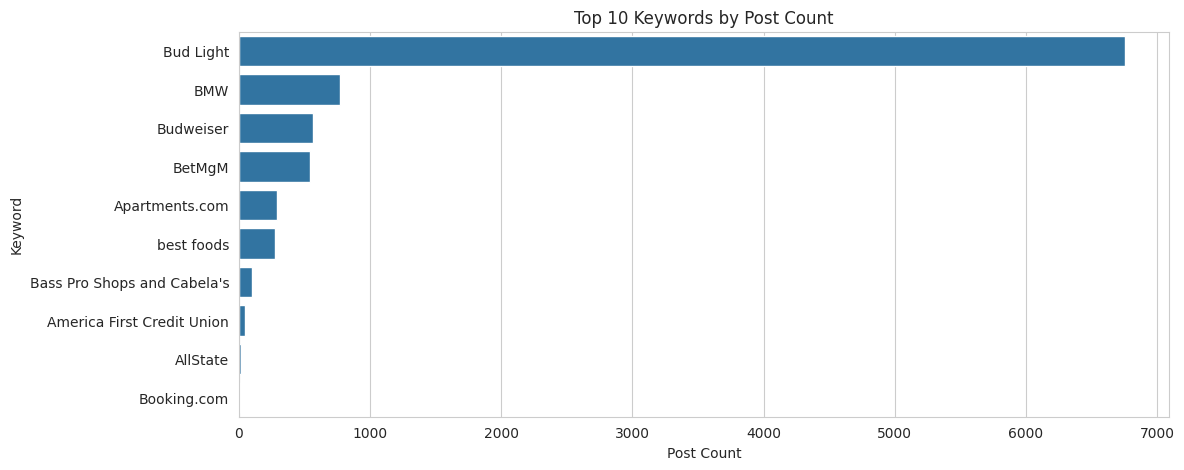

In [26]:
plt.figure(figsize=(12, 5))
sns.countplot(y=df['keyword'], order=df['keyword'].value_counts().index[:10])
plt.title("Top 10 Keywords by Post Count")
plt.xlabel("Post Count")
plt.ylabel("Keyword")
plt.show()

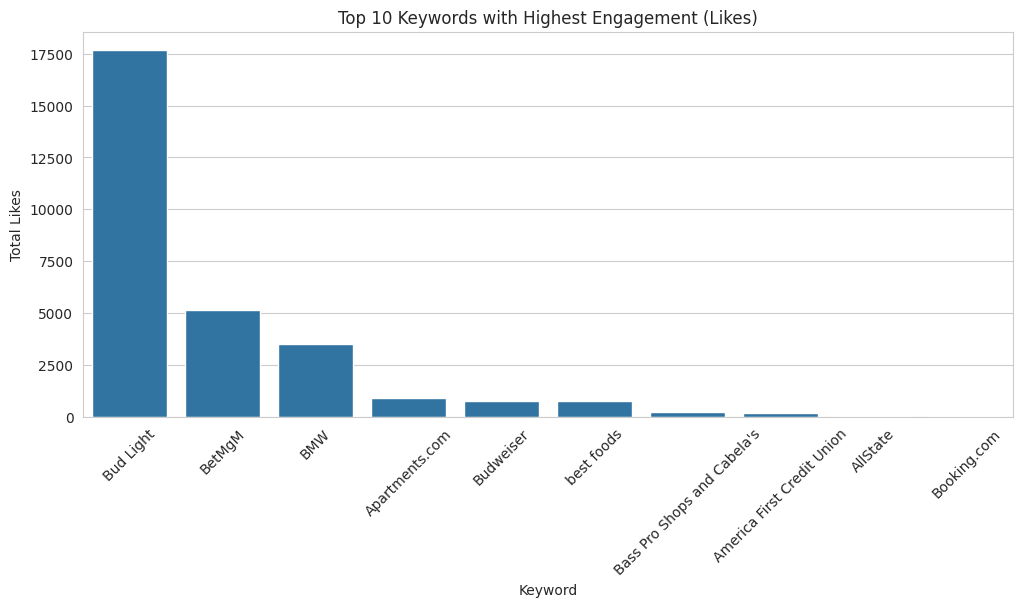

In [27]:
top_keywords = df.groupby('keyword')['public_metrics.like_count'].sum().nlargest(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_keywords.index, y=top_keywords.values)
plt.xticks(rotation=45)
plt.title("Top 10 Keywords with Highest Engagement (Likes)")
plt.xlabel("Keyword")
plt.ylabel("Total Likes")
plt.show()